## Multple Linear Regression

The world is more complicated than two dimensions and so we need models for multiple dimensions and multiple features/predictors. 

Below we will look at models that are of the form:
 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_p X_p + \epsilon$$

 We now have multiple predictors, $p$ of them in fact.  And so we have some changes to make and so things that will remain the same.  

In [3]:
# reading in the libraries and functions that we will need as we do this work.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

#### Ames Housing Data
We'll start with the Ames Housing Data again.  

In [4]:
# read in the data to dataframe called ames
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace([' ?'],np.nan)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

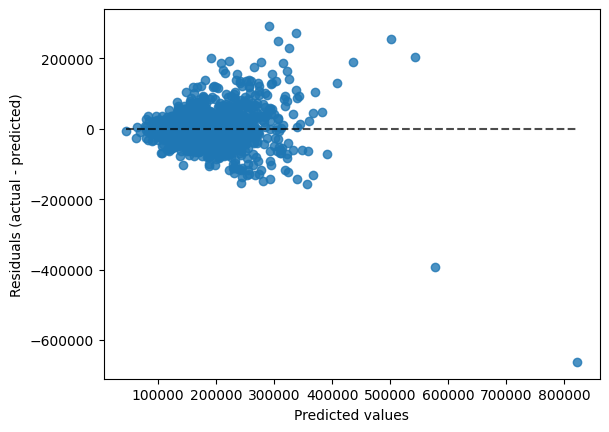

In [ ]:

model1=LinearRegression()

X = ames[['LotArea', 'GrLivArea', 'BsmtFinSF1']]
y = ames['SalePrice']

# fit the linear regression to the data.
model1.fit(X,y)

# make the residual vs fitted plot
y_hat = model1.predict(X)
# below makes a 
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()


So the RMSE is still the average difference between the predicted and observed response values.  Here that means that for this model the average difference between a predicted
sale price and the actual sale price for a home in Ames, Iowa is \$ 52475.

Our coefficients now have a slightly different interpretation.  Starting with the coefficient for *LotArea*, we can say that for each additional square foot 
of lot that a property in Ames, Iowa has then we predict that the sales price for that house will increase by \$0.33 assuming that the other predictors 
remain constant.  That last phrase, _that the other predictors remain constant_, is important.

Moving to the coefficient for *GrLivArea*, for every additional square foot of liveable space in the house we expect that the sales price of a house in Ames, IA will increase by \$97.8 assuming
that *Lot Area* and *BsmtFinSF1* are fixed.  

Lastly, for each additional square foot of finished basement, we predict that that sales price of a house in Ames will increase by \$42.3 if the lot area and the general living area are 
held constant.

In [ ]:


# for this particular model sm.OLS formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
# Note that OLS stands for Ordinary Least Squares which is the 
# methodology used to get our estimates
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

In [ ]:

# below makes a residual vs predicted values plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

Ooof, that does not look good. There is increasing variation in the residuals as the predicted values increase, heteroscedasticity, so our linear model is not appropriate here.  

Let's find some other data to look at.  

#### Blue Jay Data

In [ ]:
# read in the blue jay data
bluejay = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/BlueJays.csv", na_values=['NA'])
# remove rows with missing data
bluejay.dropna(inplace=True)
bluejay.head()

We will start with a model with just *Head* as a predictor.  Here's what we had before in _IntroLinearRegression.ipynb_.  

In [ ]:
# In sklearn we first need to create a model object 
# and here it is a linear regression
bluejay_model1= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
bluejay_x=bluejay[['Skull']]
# y needs to be a one dimensional array so single brackets work
bluejay_y=bluejay['Mass']
bluejay_model1.fit(bluejay_x, bluejay_y)

# make the residual vs fitted plot
bluejay_y_hat = bluejay_model1.predict(bluejay_x)
# below makes a 
display = PredictionErrorDisplay(y_true=bluejay_y, y_pred=bluejay_y_hat)
display.plot()
plt.show()

In [ ]:
# this is code for making the qqplot

# get the predicted values from the model
bluejay_y_hat = bluejay_model1.predict(bluejay_x)  
# calculate the residuals 
bluejay_residuals = bluejay_y -bluejay_y_hat
# generate the qq plot and put a line through the points to help us visualize the relationship here    
sm.qqplot(bluejay_residuals, line ='s') 
# 
py.show() 

Both of these plots look good.  Let's get the model summary.

In [ ]:
# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
bluejay_x2 = sm.add_constant(bluejay_x)

#fit linear regression model
bluejay_model2 = sm.OLS(bluejay_y, bluejay_x2).fit()

#view model summary
print(bluejay_model2.summary())

In [ ]:
# Evaluate the model via the RMSE
rmse = root_mean_squared_error(bluejay_y, bluejay_y_hat)
print('Root Mean Squared Error:', rmse)



### Multiple Regression
Now we are going to add some predictors.  

In [ ]:

# below we build a multiple regression model with three predictors
#  Predictors here are Head, BillDepth, and BillLength
# Our target variable will be the Mass of the blue jay 

X = bluejay[['Head', 'BillDepth', 'BillLength']]  
y = bluejay['Mass']  


# Create a linear regression model
blue_model = LinearRegression()

# Fit the model on the  data
blue_model.fit(X, y)

# Make predictions on the  data
y_hat = blue_model.predict(X)

# Evaluate the model performance
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)

# Get the coefficients and intercept
print('Coefficients:', blue_model.coef_)
print('Intercept:', blue_model.intercept_)

In [ ]:
# below makes a residual plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

In [ ]:
# this is code for making the qqplot


# calculate the residuals 
bluejay_residuals = y - y_hat
# generate the qq plot and put a line through the points to help us visualize the relationship here    
sm.qqplot(bluejay_residuals, line ='s') 
# 
py.show() 

Both of the plots above look good, so let's look at the model summary.

In [ ]:
# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(X)

#fit linear regression model using OLS
blue_model2 = sm.OLS(y, x2).fit()

#view model summary
print(blue_model2.summary())

In [ ]:
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)

So let's take a crack at interpretting this output.

For $r^2$ we have the $46.3\%$ of the variability in blue jay mass can be explained by the relationship with head size, bill depth and bill length.  Contrast this with $30.6\%$ that we had for $r^2$ with the model that just had 'head' as a predictor.  So we are gaining something by adding the BillDepth and BillLength.

Our RMSE here is $3.480$ g which means that the average magnitude of the difference between the predicted blue jay mass and the observed blue jay mass is $3.48$ grams.  This is better than our model with just 'head' which had an RMSE of $3.96$.  

Turning to the model coefficients:

Our y-intercept is estimated to be $-50.2$ which means that for a blue jay with a Bill depth of 0 mm, a bill length of 0 mm and a head size of 0mm, we would predict that their body mass would be -50.2 g.

For the coefficient of head which has a value of $2.45$, we predict that for each additional mm of head size that a blue jays mass will increase by $2.45$ grams assuming that bill depth and bill length of that blue jay remain the same.

Moving to *BillDepth*, assuming that head size and bill length of a blue jay are unchanged, for each additional mm of bill depth that a blue jay has, we predict that the mass of that blue jay will be increased by $2.81$ g.

Lastly for each additional mm of bill length that a blue jay has, this model predicts that that blue jay's mass will decrease by $1.51$ g if the head size and bill depth are held constant. 

Some other notes on this output.  First all of the p-values for testing if the coefficients are zero are small so we can conclude that each of the coefficients in the model is significantly/discernibly different from zero.



#### F-test of model utility
 
Here is another way to evaluate the overall utility of a model.  The hypothesis being carried out here is the following:

$H_0: \beta_1 = \beta_2 = \beta_3 = \ldots = \beta_p=0$ vs. $H_a: $not $H_0$.

The results for this test can be found in the output above:

F-statistic:                     34.16

Prob (F-statistic):           5.35e-16

The p-value is represented by *Prob (F-statistic)* which here is very small, $5.35 x 10^{-16}$ and so we can reject the null hypothesis and conclude that at least one of our coefficients, our $\beta$'s, is not zero.


#### $R^2$ squared adjusted

For the model above the $r^2_{adj}$ is 0.449.  By itself this is just our $r^2$ value with a small amount subtracted for having three predictors in the model.  The measure, $r^2_{adj}$ is primarily used for comparing across models, specifically when they are of different sizes, ie have different $p$'s or the number of predictors.  

### Blue Jay models with Interaction

So let's take a look at another model for predicting blue jay mass, this time we will add the variable *Sex* to the model with *BillLength* as the other predictor.

In [ ]:
# below we build a multiple regression model with three predictors
# Those predictors are LotArea, GrLivArea and BsmtFinSF1
# 
# Our target variable will be the SalePrice 

X = bluejay[['BillLength', 'Sex']]  
y = bluejay['Mass']  


# Create a linear regression model
blue_model2 = LinearRegression()

# Fit the model on the  data
blue_model2.fit(X, y)

# Make predictions on the  data
y_hat = blue_model2.predict(X)

# Evaluate the model
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)



In [ ]:
# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(X)

#fit linear regression model
blue_model2 = sm.OLS(y, x2).fit()

#view model summary
print(blue_model2.summary())

So we have a model now that is really two models: one for females (*Sex ==0*) and one for males (*Sex ==1*).  

Let's look at the interpretation of the coefficients.  Some of these interpretation are different due to the use of the indicator variable *Sex* here.

$40.0$ here is the predicted mass of a female blue jay with a bill length of $0$ mm.  Note that when the variable *Sex* takes the value *0* that represents a female blue jay.

For each additional mm of bill length for a blue jay, the predicted increase of mass of that blue jay is $1.23$ g assuming that the *Sex* of the blue jay does not change.

The coefficient for the variable *Sex* represents that the predicted difference in mass between a male blue jay and a female blue jays when the blue jay has a bill length of zero mm is $1.84$.

Next we will look at a model with an **interaction** term between *BillLength* and *Sex*.



In [ ]:
# 
# Our target variable will be the SalePrice 
bluejay['BillDepth_Sex'] = bluejay['BillDepth']*bluejay['Sex']

X = bluejay[['BillDepth', 'Sex', 'BillDepth_Sex']]  
y = bluejay['Mass']  


# Create a linear regression model
bluejay_model3 = LinearRegression()

# Fit the model on the  data
bluejay_model3.fit(X, y)

# Make predictions on the  data
y_hat = bluejay_model3.predict(X)

# Evaluate the model
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)


In [ ]:
# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(X)

#fit linear regression model
blue_model3 = sm.OLS(y, x2).fit()

#view model summary
print(blue_model3.summary())

So some things to look in this output.  The coefficients for the variables *Sex* and the interaction term *BillDepth_Sex* are not 
discernibly different from zero.  So we might consider dropping them from the model, though when we fit the model without *BillDepth_Sex* the coefficient for *Sex* is significant if barely.

To add to the discussion, the smaller model above has a noticeably smaller $r^2$ and $r^2_{adj}$ so that the
fuller model with the interaction term is generally performing better --- lower RMSE too --- than 
the model without the interaction. 

This is where modelling becomes harder.  As we have more and more features to consider, finding the right combination of
features to make a good model is important.  More to come.

Let's look at the coefficients next.

For a female blue jay with a bill depth of 0 mm, we would predict their body mass to be 20.5.

For a female blue jay for each additional mm of bill depth, we expect that their body mass would increase by 6.15 g.

For a male blue jay with a bill depth of 0mm, we predict that their body mass would be 31.6 g higher than a female blue jays.

For a male blue jay the amount of body mass that we predict a blue jay to gain for each additional mm of bill depth is 3.65 g less
than what we would expect the gain to be for a female blue jay.

Because of the structure of the indicator variables that we have created, the interpretations for the last two coefficients (for *Sex* and for *BillDepth_Sex*) are as differences.  

### Tasks

1. Using the Blue Jays data, fit a regression model to predict body mass using *Sex* and *Skull*.  Make the residual plot and the QQplot.  Determine if the linear model is appropriate for these data.

2. Using the regression that you created in Task 1, find and interpret the $r^2$ and the $RMSE$ values.

3. Using the regression that you created in Task 1, find and interpret all of the coefficients for this model.

4. Predict the body mass of a male blue jay with a Skull size of 31 mm.

5. Predict the body mass of a female blue jay with a Skull size of 31 mm.

6. What is the difference in your predictions from Task 4 and Task 5. 

7. Create a new variable that is an interaction between *Sex* and *Skull*.  Create a model with this new variable added to the terms in the model from Task 1.

8. Interpret the coefficients for the model you make in Task 4.

9. Based upon $r^2_{adj}$ which model is best from among those in this notebook for predicting blue jay mass. 

10. Based upon RMSE which model is best from among those in the notebook for predicting blue jay mass

11.  For the model in you fit in Task 4, which of the predictors were statistically discernible from zero?  How do you know?  What does this tell you about the value of those predictors?

12.  What are the p-value and your conclusions from an F-test of model utility for the model you fit in Task 4?  How does that connect with your answers in Task 7.